# Математическая статистика

In [1]:
import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

**Задача.** Получение и визуализация выборки заданного дискретного и непрерывного распределения 

<i>Шаг 1.</i> 

Из списка дискретных случайных величин и непрерывных выберите случайные величины с номером $N$. 

In [2]:
N = 14 # номер в группе
variants = np.array([1, 4, 6, 7, 12, 27, 28, 29.5, 30, 31.9, 32, 39, 39.1, 39.2, 39.3, 39.4, 40, 41, 42, 50])
freq = np.array([2, 3, 4, 5, 6, 7, 7, 5, 6, 7, 8, 10, 25, 1, 1, 1, 1, 1, 4, 1]) / 105

print('Сумма частот: ', sum(freq), ', что не равно 1 из-за дискретности ЭВМ, поэтому далее будет выполнена нормализация')

Сумма частот:  0.9999999999999997 , что не равно 1 из-за дискретности ЭВМ, поэтому далее будет выполнена нормализация


Визуализируем входные данные:

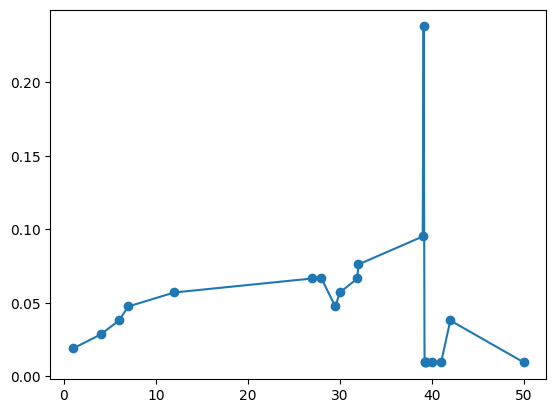

{1.0: 0.01904761904761905,
 4.0: 0.02857142857142857,
 6.0: 0.0380952380952381,
 7.0: 0.047619047619047616,
 12.0: 0.05714285714285714,
 27.0: 0.06666666666666667,
 28.0: 0.06666666666666667,
 29.5: 0.047619047619047616,
 30.0: 0.05714285714285714,
 31.9: 0.06666666666666667,
 32.0: 0.0761904761904762,
 39.0: 0.09523809523809523,
 39.1: 0.23809523809523808,
 39.2: 0.009523809523809525,
 39.3: 0.009523809523809525,
 39.4: 0.009523809523809525,
 40.0: 0.009523809523809525,
 41.0: 0.009523809523809525,
 42.0: 0.0380952380952381,
 50.0: 0.009523809523809525}

In [3]:
table = dict(zip(variants, freq))
plt.plot(variants, freq, '-o')
plt.show()
table

<i>Шаг 2.</i>

Для данных случайных величин, как в примере в конце практикума, создайте функцию распределения вашей случайной величины (если необходимо).

In [4]:
freq_norm = tuple(p / sum(freq) for p in freq) # трюк, чтобы сумма все же была равна единице
distribution = sps.rv_discrete(values = (variants, freq_norm))

<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант (см. пример в конце этого документа).

In [5]:
size = 100
sample = distribution.rvs(size = size)

In [6]:
sample

array([31.9, 31.9, 39.1, 39. , 39.1, 40. , 29.5, 39.1,  7. , 39. , 39. ,
        4. , 31.9, 39.1, 39. , 40. ,  1. , 29.5, 39.1, 31.9, 39.1, 39. ,
        6. , 30. ,  6. , 39.1, 29.5, 32. , 39. , 27. , 50. , 39.3, 28. ,
       50. , 39.1,  6. , 32. , 30. , 42. , 31.9, 42. , 39.1, 39. , 28. ,
       27. ,  6. , 41. ,  6. , 39.1,  1. , 12. , 39.1, 42. , 39. , 39.1,
       31.9, 12. , 12. ,  1. , 39.1, 39.1, 31.9, 39.1,  7. , 39.1,  7. ,
       39.1, 29.5, 42. , 27. , 39. ,  4. , 39.4, 39.1, 32. ,  1. , 30. ,
        4. , 32. , 39.4, 32. , 31.9,  1. , 28. , 42. ,  6. , 39.1, 28. ,
       42. , 32. , 32. , 30. ,  7. , 39.1, 39.1,  4. , 28. , 39.1, 12. ,
       28. ])

In [7]:
variants

array([ 1. ,  4. ,  6. ,  7. , 12. , 27. , 28. , 29.5, 30. , 31.9, 32. ,
       39. , 39.1, 39.2, 39.3, 39.4, 40. , 41. , 42. , 50. ])

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [8]:
from collections import Counter
from collections import OrderedDict

counter = Counter(sample)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

In [9]:
def find_median(array):
    middle = len(array) / 2.
    if (middle % 1 == 0):
        return (array[int(middle) + 1] + array[int(middle)]) / 2
    else:
        return array[int(middle)]
    
def find_mode(array):
    return max(set(array), key = array.count)

In [11]:
print('Объем выборки:', size)
print('Минимум, максимум:', (min(sample), max(sample)))

avg = sum(sample) / size

print('Среднее:', avg)
print('Размах:', max(sample) - min(sample))

def moment(n):
    return np.sum(list(map(lambda x: (x - avg) ** n, sample))) / size

print('Ассиметрия:', moment(3) / moment(2) ** (3 / 2))
print('Эксцесс:', moment(4) / (moment(2) ** 2) - 3)

print('II момент:', moment(2))
print('III момент:', moment(3))
print('IV момент:', moment(4))

print('Медиана:', find_median(list(sample)))
print('Мода:', find_mode(list(sample)))

Объем выборки: 100
Минимум, максимум: (1.0, 50.0)
Среднее: 29.01499999999999
Размах: 49.0
Ассиметрия: -0.9347269109439258
Эксцесс: -0.5209820746591656
II момент: 185.878875
III момент: -2368.8076627499945
IV момент: 85652.439686233
Медиана: 25.55
Мода: 39.1


Получаем значения через функции из пакета Stats

In [12]:
obj = sps.describe(sample)
print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(sample, moment = 2))
print('III момент:', sps.moment(sample, moment = 3))
print('IV момент:', sps.moment(sample, moment = 4))

mode = sps.mode(sample, keepdims = False)

print('Мода:', mode.mode, 'количество:', mode.count)

Объем выборки: 100
Минимум, максимум: (1.0, 50.0)
Среднее: 29.014999999999997
Дисперсия: 187.75643939393933
Ассиметрия: -0.9347269109439278
Эксцесс: -0.5209820746591616
II момент: 185.87887499999994
III момент: -2368.807662749998
IV момент: 85652.43968623309
Мода: 39.1 количество: 22


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [13]:
counter

Counter({31.9: 8,
         39.1: 22,
         39.0: 9,
         40.0: 2,
         29.5: 4,
         7.0: 4,
         4.0: 4,
         1.0: 5,
         6.0: 6,
         30.0: 4,
         32.0: 7,
         27.0: 3,
         50.0: 2,
         39.3: 1,
         28.0: 6,
         42.0: 6,
         41.0: 1,
         12.0: 4,
         39.4: 2})

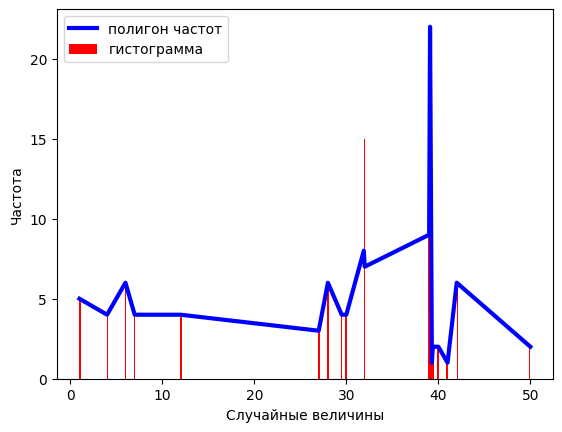

In [14]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(sample, 3 * size, color = 'red', label = 'гистограмма')
plt.legend()

plt.xlabel('Случайные величины')
plt.ylabel('Частота')

plt.show()